# Task 1
## 1. Env set up
1. scoop install Python
2. pip install jupyter pandas numpy matplotlib
3. VSCode with extensions: jupytor, python, Copilot(Core: Claude Sonnet 4)
---
## 2. Learning/Working route
1. figure out task-involved knowledge range, in this case package calling
2. watch some short videos about these package to quickly get knowing what they do, have, and their advantages
3. check their usage in the official documents
4. learn new concepts like OneHot encoding, ask AI about its common realizations, and learn related methods
5. ask AI about common ways of processing numerical data and do it under guidance
6. when visualizing, using AI to help adjust the parameters
---
## 3. Work Sequentially
#### a. Before start
- import, read and check data

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train_data = pd.read_csv('../MBAAdmission/train.csv')
test_data = pd.read_csv('../MBAAdmission/test.csv')

# having a look at the data
print(train_data.head())
print("----------------------------------------------------------------------------")
print(train_data.info())
print("----------------------------------------------------------------------------")
print(train_data.describe())

   application_id  gender international   gpa       major      race   gmat  \
0               1  Female         False  3.30    Business     Asian  620.0   
1               2    Male         False  3.28  Humanities     Black    NaN   
2               3  Female          True  3.30    Business       NaN  710.0   
3               4    Male         False  3.47        STEM     Black  690.0   
4               5    Male         False  3.35        STEM  Hispanic  590.0   

   work_exp          work_industry admission  
0       3.0     Financial Services     Admit  
1       5.0  Investment Management    Reject  
2       5.0             Technology     Admit  
3       NaN             Technology    Reject  
4       5.0             Consulting    Reject  
----------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6095 entries, 0 to 6094
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------         

#### b. Subtask 1
- learn basic methods for DataFrame:
    1. select_dtypes()
    2. describe()
    3. count(), nunique(), etc.
- display tables for categorical data 1 by 1

In [76]:
# Subtask 1: traits and characteristics
numerical_cols = train_data.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = train_data.select_dtypes(include=['object']).columns.tolist()

# Numerical columns
print("----------------------------------------------------------------------------------")
print("Numerical Columns:", numerical_cols)
display(train_data[numerical_cols].describe(percentiles=[.5]))
print("----------------------------------------------------------------------------------\n\n")

# Categorical columns
print("----------------------------------------------------------------------------------")
print("Categorical Columns:", categorical_cols)
display(train_data[categorical_cols].describe())
# column-wise
for col in categorical_cols:
    print(f"\nColumn '{col}':")
    table = {'Count': train_data[col].count(),
             'Unique': train_data[col].nunique(),
             'Top': train_data[col].value_counts().idxmax(),
             'Freq': train_data[col].value_counts().max(),
             'Missing': train_data[col].isnull().sum()
             }
    display(pd.DataFrame.from_dict(table, orient='index', columns=[col]))
    print(f"Value Counts for {train_data[col].value_counts()}\n")
print("----------------------------------------------------------------------------------")


----------------------------------------------------------------------------------
Numerical Columns: ['application_id', 'gpa', 'gmat', 'work_exp']


,application_id,gpa,gmat,work_exp
count,6095.000000,5790.000000,5790.000000,5790.000000
mean,3104.612141,3.249636,650.818653,5.021934
std,1785.573306,0.151287,49.415865,1.034741
min,1.000000,2.650000,570.000000,1.000000
50%,3101.000000,3.250000,650.000000,5.000000
max,6194.000000,3.770000,780.000000,9.000000


----------------------------------------------------------------------------------


----------------------------------------------------------------------------------
Categorical Columns: ['gender', 'international', 'major', 'race', 'work_industry', 'admission']


,gender,international,major,race,work_industry,admission
count,5790,5790,5790,4062,5790,6095
unique,2,2,3,5,14,3
top,Male,False,Humanities,White,Consulting,Reject
freq,3702,4067,2314,1358,1522,5161



Column 'gender':


,gender
Count,5790
Unique,2
Top,Male
Freq,3702
Missing,305


Value Counts for gender
Male      3702
Female    2088
Name: count, dtype: int64


Column 'international':


,international
Count,5790
Unique,2
Top,False
Freq,4067
Missing,305


Value Counts for international
False    4067
True     1723
Name: count, dtype: int64


Column 'major':


,major
Count,5790
Unique,3
Top,Humanities
Freq,2314
Missing,305


Value Counts for major
Humanities    2314
STEM          1758
Business      1718
Name: count, dtype: int64


Column 'race':


,race
Count,4062
Unique,5
Top,White
Freq,1358
Missing,2033


Value Counts for race
White       1358
Asian       1078
Black        857
Hispanic     553
Other        216
Name: count, dtype: int64


Column 'work_industry':


,work_industry
Count,5790
Unique,14
Top,Consulting
Freq,1522
Missing,305


Value Counts for work_industry
Consulting               1522
PE/VC                     849
Technology                667
Nonprofit/Gov             607
Investment Banking        536
Financial Services        419
Other                     396
Health Care               306
Investment Management     156
CPG                       109
Real Estate               107
Media/Entertainment        56
Retail                     31
Energy                     29
Name: count, dtype: int64


Column 'admission':


,admission
Count,6095
Unique,3
Top,Reject
Freq,5161
Missing,0


Value Counts for admission
Reject      5161
Admit        867
Waitlist      67
Name: count, dtype: int64

----------------------------------------------------------------------------------


#### c. Subtask 2
- learn common missing data handling like fill with mean, median, forword value, etc.
- learn related methods like fillna()

In [77]:
# Subtask 2: missing values

# Overall view
print("Missing Values Summary:")
missing_counts = train_data.isnull().sum()
missing_percent = (missing_counts / len(train_data)) * 100

print(f"{'Column':<15} {'Missing':<8} {'Total':<6} {'Percentage':<10}")
print("-" * 45)
for col in train_data.columns:
    if missing_counts[col] > 0:
        print(f"{col:<15} {missing_counts[col]:>7} {len(train_data):>5} {missing_percent[col]:>8.1f}%")
print("-" * 45+"\n\n")


method = 1 # 1 or 2
# method 1: Fill with mean(numerical)
if(method == 1):
    train_data[numerical_cols]=train_data[numerical_cols].fillna(train_data[numerical_cols].mean())
# method 2: Fill with forward fill(numerical)
elif(method == 2):
    train_data[numerical_cols]=train_data[numerical_cols].fillna(method='ffill')

# method 3: Fill with mode(categorical)
for col in categorical_cols:
    train_data[col] = train_data[col].fillna(train_data[col].mode()[0])
# Verify
print("Post-Imputation Missing Values Summary:")
missing_counts_post = train_data.isnull().sum()
missing_percent_post = (missing_counts_post / len(train_data)) * 100
print(f"{'Column':<15} {'Missing':<8} {'Total':<6} {'Percentage':<10}")
print("-" * 45)
for col in train_data.columns:
    print(f"{col:<15} {missing_counts_post[col]:>7} {len(train_data):>5} {missing_percent_post[col]:>8.1f}%")
print("-" * 45)

Missing Values Summary:
Column          Missing  Total  Percentage
---------------------------------------------
gender              305  6095      5.0%
international       305  6095      5.0%
gpa                 305  6095      5.0%
major               305  6095      5.0%
race               2033  6095     33.4%
gmat                305  6095      5.0%
work_exp            305  6095      5.0%
work_industry       305  6095      5.0%
---------------------------------------------


Post-Imputation Missing Values Summary:
Column          Missing  Total  Percentage
---------------------------------------------
application_id        0  6095      0.0%
gender                0  6095      0.0%
international         0  6095      0.0%
gpa                   0  6095      0.0%
major                 0  6095      0.0%
race                  0  6095      0.0%
gmat                  0  6095      0.0%
work_exp              0  6095      0.0%
work_industry         0  6095      0.0%
admission             0  6095 

C:\Users\zxy84\AppData\Local\Temp\ipykernel_25908\2390412564.py:26: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data[col] = train_data[col].fillna(train_data[col].mode()[0])


#### d. Subtask 3
- learn the concept OneHot encoding
- learn the map() and concat() method
- learn the OneHot encoding method get_dummies()

In [78]:
# Subtask 3: One-hot encoding

# Create copies
train_encoded = train_data.copy()

# 1. Gender
print("1. Encoding for 'gender':")
gender_mapping = {gender: idx for idx, gender in enumerate(train_data['gender'].unique())}
train_encoded['gender'] = train_encoded['gender'].map(gender_mapping)
print(f"   Mapping: {gender_mapping}")
print(f"   Sample: {train_encoded['gender'].head().tolist()}\n")

# 2. International
print("2. Encoding for 'international':")
international_mapping = {np.True_: 1, np.False_: 0}
train_encoded['international'] = train_encoded['international'].map(international_mapping)
print(f"   Mapping: {international_mapping}")
print(f"   Sample: {train_encoded['international'].head().tolist()}\n")

# 3. Remaining categorical columns
# Apply one-hot encoding using pandas get_dummies
remaining_categorical = [col for col in categorical_cols if col not in ['gender', 'international']]
print(f"3. One-Hot Encoding for: {remaining_categorical}")

train_onehot = pd.get_dummies(train_encoded[remaining_categorical], \
    prefix=remaining_categorical, dtype=int)

print(f"   Created {train_onehot.shape[1]} one-hot encoded columns")
print(f"   Sample columns: {train_onehot.columns.tolist()[:3]}...\n")

# Combine all features
train_final = train_encoded.drop(columns=remaining_categorical)
train_final = pd.concat([train_final, train_onehot], axis=1)

print("ENCODING SUMMARY:")
print(f"Original shape: {train_data.shape}")
print(f"Final encoded shape: {train_final.shape}")
print(f"New columns added: {train_final.shape[1] - train_data.shape[1]}")

# Display sample
print("\nSample:")
display(train_final.head())

1. Encoding for 'gender':
   Mapping: {'Female': 0, 'Male': 1}
   Sample: [0, 1, 0, 1, 1]

2. Encoding for 'international':
   Mapping: {np.True_: 1, np.False_: 0}
   Sample: [0, 0, 1, 0, 0]

3. One-Hot Encoding for: ['major', 'race', 'work_industry', 'admission']
   Created 25 one-hot encoded columns
   Sample columns: ['major_Business', 'major_Humanities', 'major_STEM']...

ENCODING SUMMARY:
Original shape: (6095, 10)
Final encoded shape: (6095, 31)
New columns added: 21

Sample:


,application_id,gender,international,gpa,gmat,work_exp,major_Business,major_Humanities,major_STEM,race_Asian,...,work_industry_Media/Entertainment,work_industry_Nonprofit/Gov,work_industry_Other,work_industry_PE/VC,work_industry_Real Estate,work_industry_Retail,work_industry_Technology,admission_Admit,admission_Reject,admission_Waitlist
0,1,0,0,3.30,620.000000,3.000000,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,2,1,0,3.28,650.818653,5.000000,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,0,1,3.30,710.000000,5.000000,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,4,1,0,3.47,690.000000,5.021934,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
4,5,1,0,3.35,590.000000,5.000000,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


#### e. Subtask 4
- learn the common necessary processing
- learn the IQR method
- implement IQR for outlier detection
- normalize data

In [79]:
# Subtask 4: process numerical columns
print(f"Processing Numerical Columns: {numerical_cols}\n")

# 1. review basic stats
print("Review Basic Statistics of Numerical Columns:")
display(train_final[numerical_cols].describe())


# 2. Outlier Detection using IQR method
print("\n2. Outlier Detection (IQR Method):")
outlier_info = []
for col in numerical_cols:
    Q1 = train_final[col].quantile(0.25)
    Q3 = train_final[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = train_final[(train_final[col] < lower_bound) | (train_final[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(train_final)) * 100
    
    outlier_info.append({
        'Column': col,
        'Outliers': outlier_count,
        'Percentage': f"{outlier_percentage:.1f}%",
        'Lower_Bound': f"{lower_bound:.2f}",
        'Upper_Bound': f"{upper_bound:.2f}"
    })
    print(f"Column {col:>14}: {outlier_count:>3} outliers ({outlier_percentage:.1f}%)")

# Create outlier summary table
outlier_df = pd.DataFrame(outlier_info)
print("\nOutlier Summary:")
display(outlier_df)


# 3. Normalization
print("\n3. Applying Standard Scaling (Manual Implementation):")

# Calculate scaling parameters
train_scaled = train_final.copy()

numerical_data = train_final[numerical_cols].values
means = np.mean(numerical_data, axis=0)
stds = np.std(numerical_data, axis=0, ddof=1)
scaled_data = (numerical_data - means) / stds

train_scaled[numerical_cols] = scaled_data
print("Scaling parameters:")
for i, col in enumerate(numerical_cols):
    print(f"Column {col:>14}: mean={means[i]:<9.4f}, std={stds[i]:.4f}")


Processing Numerical Columns: ['application_id', 'gpa', 'gmat', 'work_exp']

Review Basic Statistics of Numerical Columns:


,application_id,gpa,gmat,work_exp
count,6095.000000,6095.000000,6095.000000,6095.000000
mean,3104.612141,3.249636,650.818653,5.021934
std,1785.573306,0.147452,48.163379,1.008514
min,1.000000,2.650000,570.000000,1.000000
25%,1560.500000,3.150000,620.000000,4.000000
50%,3101.000000,3.249636,650.000000,5.000000
75%,4651.500000,3.350000,680.000000,6.000000
max,6194.000000,3.770000,780.000000,9.000000



2. Outlier Detection (IQR Method):
Column application_id:   0 outliers (0.0%)
Column            gpa:  42 outliers (0.7%)
Column           gmat:  60 outliers (1.0%)
Column       work_exp:   0 outliers (0.0%)

Outlier Summary:


,Column,Outliers,Percentage,Lower_Bound,Upper_Bound
0,application_id,0,0.0%,-3076.00,9288.00
1,gpa,42,0.7%,2.85,3.65
2,gmat,60,1.0%,530.00,770.00
3,work_exp,0,0.0%,1.00,9.00



3. Applying Standard Scaling (Manual Implementation):
Scaling parameters:
Column application_id: mean=3104.6121, std=1785.5733
Column            gpa: mean=3.2496   , std=0.1475
Column           gmat: mean=650.8187 , std=48.1634
Column       work_exp: mean=5.0219   , std=1.0085


#### f. Subtask 5
- visualize original and normalized data distribution

Original Distributions VS Scaled Distributions:


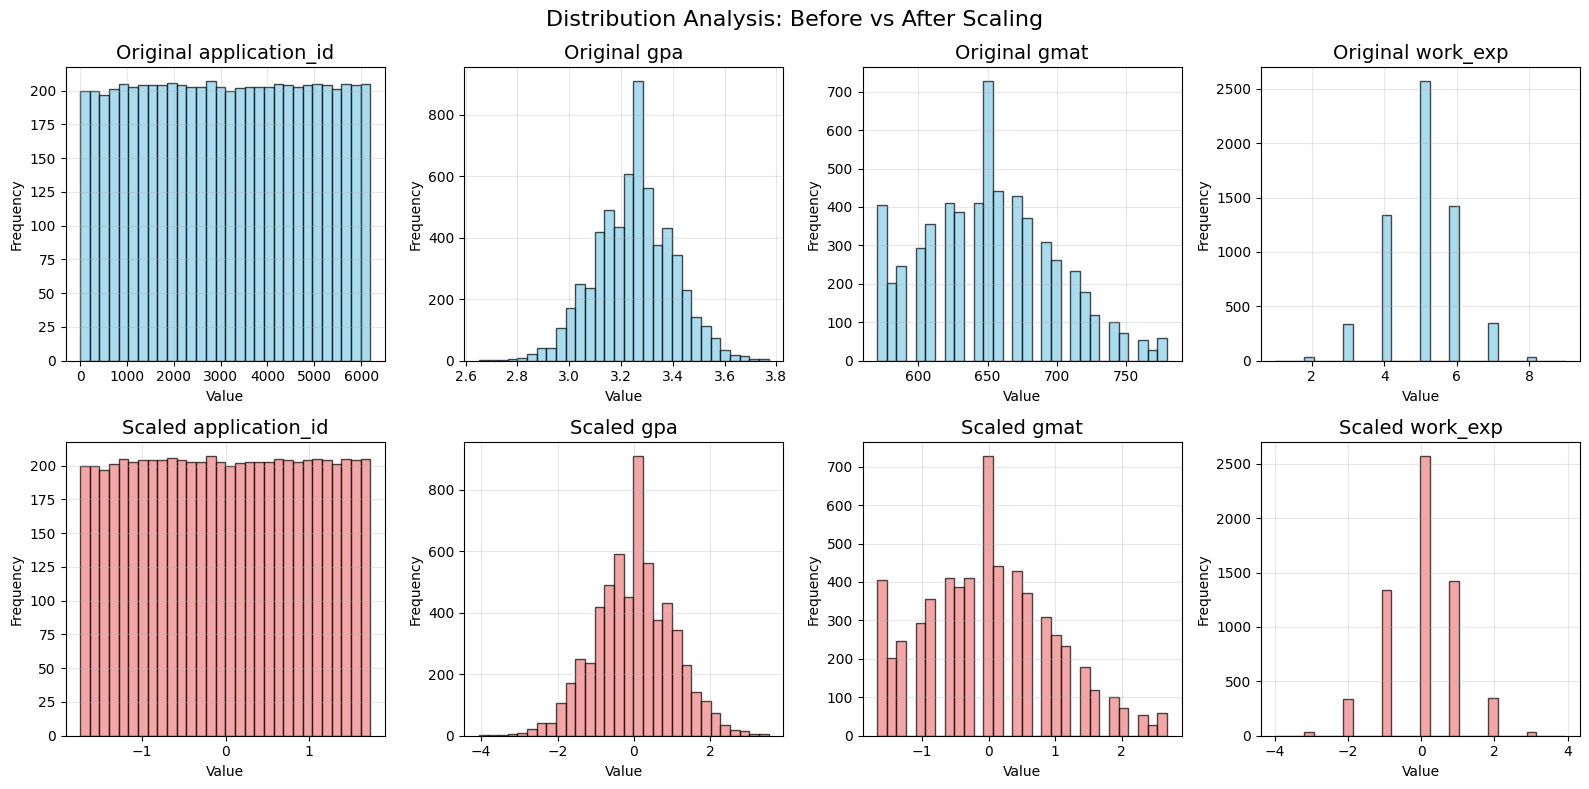

In [80]:
# Subtask 5: Visualization

# Visualization of Original Distributions
print("Original Distributions VS Scaled Distributions:")
n_features = len(numerical_cols)
fig, axes = plt.subplots(2, n_features, figsize=(4*n_features, 8))
if n_features == 1:
    axes = axes.reshape(-1, 1)
fig.suptitle('Distribution Analysis: Before vs After Scaling', fontsize=16)

# Plot original distributions
for i, col in enumerate(numerical_cols):
    axes[0, i].hist(train_final[col], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, i].set_title(f'Original {col}', fontsize=14)
    axes[0, i].set_xlabel('Value')
    axes[0, i].set_ylabel('Frequency')
    axes[0, i].grid(True, alpha=0.3)
    
# Plot scaled distributions
for i, col in enumerate(numerical_cols):
    axes[1, i].hist(train_scaled[col], bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
    axes[1, i].set_title(f'Scaled {col}', fontsize=14)
    axes[1, i].set_xlabel('Value')
    axes[1, i].set_ylabel('Frequency')
    axes[1, i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#### g. Subtask 6
- compute and visualize the correlation for numerical data

Correlation Analysis for Scaled Numerical Columns: ['application_id', 'gpa', 'gmat', 'work_exp']
Correlation Matrix:


,application_id,gpa,gmat,work_exp
application_id,1.000000,0.010391,0.010590,0.006352
gpa,0.010391,1.000000,0.553545,0.001956
gmat,0.010590,0.553545,1.000000,-0.003308
work_exp,0.006352,0.001956,-0.003308,1.000000


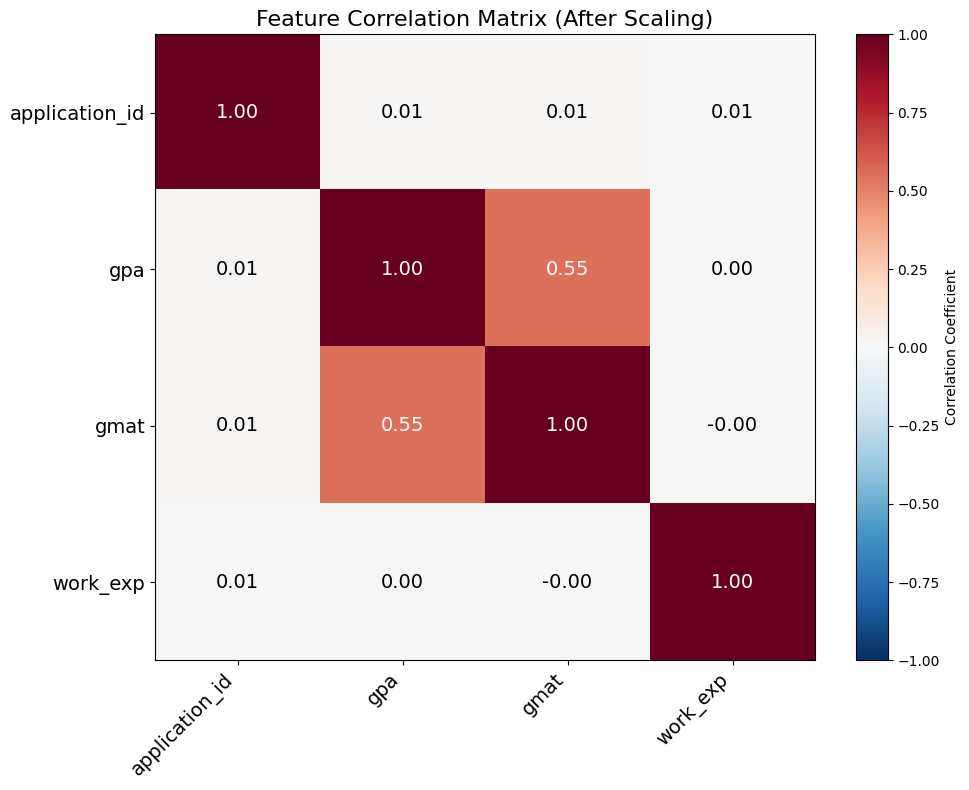

In [81]:
# Subtask 6: Exploration

# 1. Correlation Analysis based on scaled data
print(f"Correlation Analysis for Scaled Numerical Columns: {numerical_cols}")
correlation_matrix = train_scaled[numerical_cols].corr()
print("Correlation Matrix:")
display(correlation_matrix)

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
correlation_values = correlation_matrix.values

# Create correlation heatmap
im = plt.imshow(correlation_values, cmap='RdBu_r', aspect='auto', vmin=-1, vmax=1)
plt.colorbar(im, label='Correlation Coefficient')
plt.title('Feature Correlation Matrix (After Scaling)', fontsize=16)

# Set tick labels
plt.xticks(range(len(numerical_cols)), numerical_cols, rotation=45, ha='right',fontsize=14)
plt.yticks(range(len(numerical_cols)), numerical_cols, fontsize=14)

# Add correlation values as text
for i in range(len(numerical_cols)):
    for j in range(len(numerical_cols)):
        text = plt.text(j, i, f'{correlation_values[i, j]:.2f}',
                       ha='center', va='center', 
                       color='white' if abs(correlation_values[i, j]) > 0.5 else 'black',
                       fontsize=14)

plt.tight_layout()
plt.show()